<a href="https://colab.research.google.com/github/pabloamtzs/ml-m2-portafolio/blob/main/portafolio_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carga y Limpia de de los Datos

In [194]:
# Cargar los datos de prueba desde un archivo CSV
df_test = pd.read_csv('test.csv')
df_test.head()  # Muestra las primeras filas de los datos de prueba

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [195]:
# Cargar los datos de entrenamiento desde un archivo CSV
df_train = pd.read_csv('train.csv')
df_train.head()  # Muestra las primeras filas de los datos de entrenamiento

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [196]:
df_train.describe()  # Descripciones básicas del dataset de entrenamiento

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [197]:
df_train.isna().sum()  # Contar cuántos valores faltan hay en cada columna

,0
x,0
y,1


In [198]:
# Número de observaciones en el dataset de entrenamiento
df_train.shape[0]

700

In [199]:
# Eliminamos las filas con valores faltantes
df_train.dropna(axis='rows', inplace=True)

In [200]:
# Número de observaciones y atributos después de eliminar las filas con valores faltantes
df_train.shape

(699, 2)

In [201]:
# Descripciones del dataset después de la limpieza
df_train.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


In [202]:
# Extraer los valores de 'x' y 'y' como arreglos de numpy
X = df_train[['x']].values.flatten()
y = df_train['y'].values

In [203]:
# Dimensiones de los arreglos X e y
X.shape

(699,)

In [204]:
y.shape

(699,)

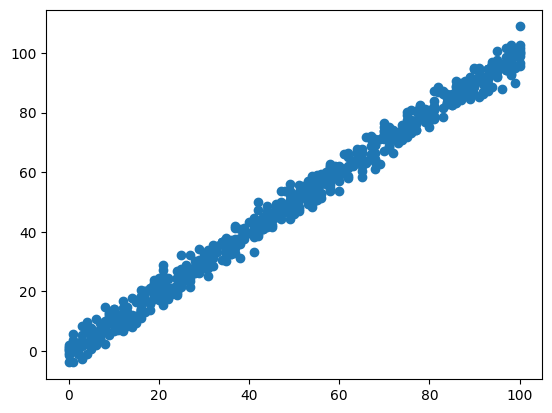

In [205]:
# Visualizamos los datos
plt.scatter(X, y)
plt.show()

In [206]:
# Escalamos los datos (normalización) para mejorar la estabilidad del entrenamiento
X_mean = np.mean(X)  # Media de X
X_std = np.std(X)    # Desviación estándar de X
X = (X - X_mean) / X_std  # Escalar X

y_mean = np.mean(y)  # Media de y
y_std = np.std(y)    # Desviación estándar de y
y = (y - y_mean) / y_std  # Escalar y

## Funciones de regresión lineal y gradient descent

In [207]:
def update_w_and_b(X, y, w, b, alpha):
    '''Actualiza los parámetros w y b en una época utilizando descenso de gradiente'''
    dl_dw = 0.0  # Gradiente de w
    dl_db = 0.0  # Gradiente de b
    N = len(X)   # Número de observaciones
    for i in range(N):
        y_pred = w * X[i] + b  # Predicción actual
        error = y[i] - y_pred  # Error de la predicción
        dl_dw += -2 * X[i] * error  # Derivada parcial respecto a w
        dl_db += -2 * error         # Derivada parcial respecto a b
    # Actualizar w y b usando el tamaño de paso (alpha)
    w -= (1 / float(N)) * dl_dw * alpha
    b -= (1 / float(N)) * dl_db * alpha
    return w, b

def avg_loss(X, y, w, b):
    '''Calcula el error cuadrático medio (MSE) para una característica'''
    N = len(X)  # Número de observaciones
    total_error = 0.0
    for i in range(N):
        y_pred = w * X[i] + b  # Predicción
        total_error += (y[i] - y_pred) ** 2  # Suma de errores cuadrados
    return total_error / float(N)  # MSE

def train(X, y, w, b, alpha, epochs):
    '''Itera sobre múltiples épocas e imprime el progreso del entrenamiento'''
    print('Training progress:')
    for e in range(epochs):
        w, b = update_w_and_b(X, y, w, b, alpha)  # Actualizar w y b
        if e % 5000 == 0:  # Cada 5000 épocas, imprime el estado actual
            avg_loss_ = avg_loss(X, y, w, b)
            print("Epoch {} | Loss: {} | w:{}, b:{}".format(e, avg_loss_, round(w, 4), round(b, 4)))
    return w, b

def train_and_plot(X, y, w, b, alpha, epochs):
    '''Itera sobre múltiples épocas y muestra gráficos que muestran el progreso'''
    for e in range(epochs):
        w, b = update_w_and_b(X, y, w, b, alpha)  # Actualizar w y b
        if e == epochs - 1:  # En la última época, muestra el gráfico
            avg_loss_ = avg_loss(X, y, w, b)
            plt.scatter(X, y, color='blue', label='Data')  # Datos originales
            y_pred = predict(X, w, b)  # Predicciones
            plt.plot(X, y_pred, color='red', label='Model')  # Línea de regresión
            plt.title("Epoch {} | Loss: {} | w:{}, b:{}".format(e, round(avg_loss_, 2), round(w, 4), round(b, 4)))
            plt.xlabel('YearsExperience')  # Etiqueta del eje x
            plt.ylabel('Salary')  # Etiqueta del eje y
            plt.legend()
            plt.show()
    return w, b

def predict(X, w, b):
    '''Realiza predicciones utilizando un modelo lineal simple'''
    return w * X + b  # Fórmula de predicción lineal

## Entrenar modelo

In [208]:
# Inicializar parámetros
w = 0  # Peso inicial
b = 0  # Intercepto inicial
alpha = 0.001  # Learning Rate
epochs = 20000  # Número de epochs

# Entrenar el modelo
w, b = train(X, y, w, b, alpha, epochs)

Training progress:
Epoch 0 | Loss: 0.9960411566785177 | w:0.002, b:-0.0
Epoch 5000 | Loss: 0.009298470090950715 | w:0.9953, b:-0.0
Epoch 10000 | Loss: 0.009298468097448182 | w:0.9953, b:-0.0
Epoch 15000 | Loss: 0.009298468097448175 | w:0.9953, b:-0.0


## Visualizamos el progreso del entrenamiento

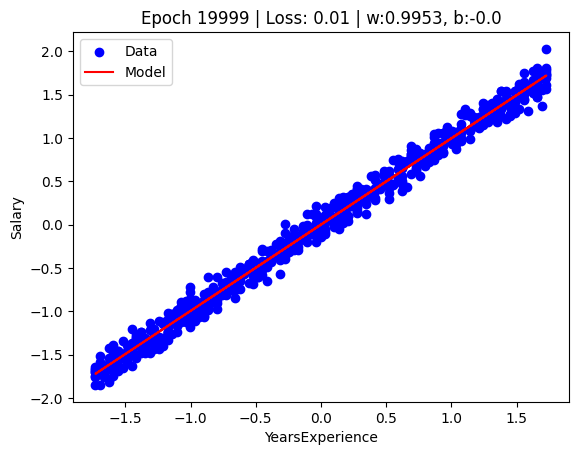

(0.9953399077212249, -2.4980224533296406e-16)

In [210]:
train_and_plot(X, y, w, b, alpha, epochs)  # Llama a la función para entrenar y mostrar el progreso

In [186]:
# Valor específico para realizar la predicción
predict_x = 40

# Escalar el valor de x
predict_x_scaled = (predict_x - X_mean) / X_std

# Realizar la predicción escalada
predict_y_scaled = predict(predict_x_scaled, w, b)

# Desescalar la predicción para obtener el valor original
predict_y = predict_y_scaled * y_std + y_mean

print('Para x={}, la predicción de y es y={}'.format(predict_x, round(predict_y, 4)))


Para x=40, la predicción de y es y=39.919


Mean Squared Error on test data: 9.43292219203995


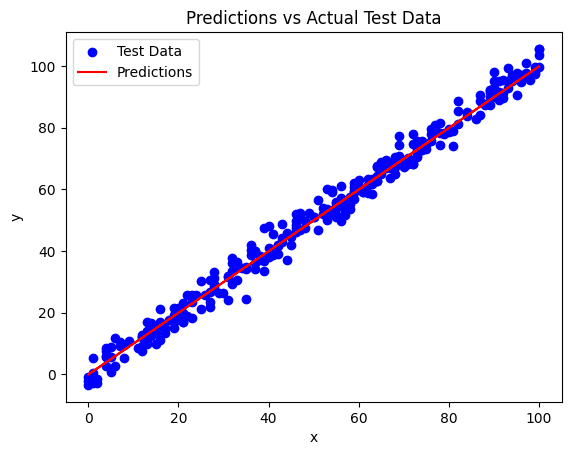

In [182]:
# Escalar los datos de prueba
X_test = df_test['x'].values.flatten()
y_test = df_test['y'].values

X_test_scaled = (X_test - X_mean) / X_std
y_test_scaled = (y_test - y_mean) / y_std

# Realizar predicciones
y_pred_scaled = predict(X_test_scaled, w, b)

# Desescalar las predicciones
y_pred = y_pred_scaled * y_std + y_mean

# Calcular el error medio cuadrático en el conjunto de prueba
mse_test = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error on test data:", mse_test)

# Visualizar resultados
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions vs Actual Test Data')
plt.legend()
plt.show()
